# Automated Feature Engineering with Featuretools

_Automated feature engineering aims to help the data scientist by automatically creating many candidate features out of a dataset from which the best can be selected and used for training._ In this notebook we use [Featuretools](https://docs.featuretools.com/). 

Featuretools which is designed to generate features relational datasets. Let's use Featureools to engineer features from the Home Credit data set.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from quilt.data.avare import homecredit
import featuretools as ft

import pandas as pd
pd.set_option('display.max_columns', 125)
import random 

# Overview: Featuretools

To use Featuretools, we must encode the data types for each table and relationships among the tables. The tables and relationships are depicted here:

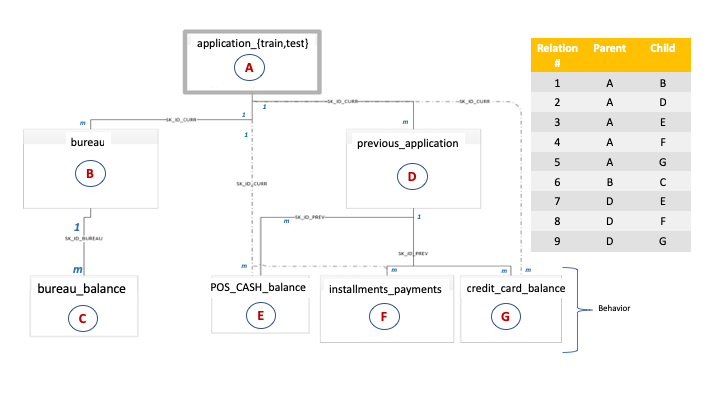

# Load Data and Make a Copy 

Create a cop, since any modifications in code sem to also overwrite the repo.

In [20]:
from quilt.data.avare import homecredit
frames = homecredit.copy(deep=True)   

AttributeError: 

# Validate Data Types

Pandas,infers typewhen reasing csv. Sometimes, the inferred ones may not be what you expect. We could avoid this problem by including the types as an argument in the read_csv, but - we did not use read_csv() with Quilt.

To handle the mismatch, we automatically created a  data desription file that has  mapping from column names to python data types.

In [17]:
# create a new description file if one does not exist.
description = pd.read_csv('data/new_data_description_file.csv')
description.head()

,Row,Table,Type
0,SK_ID_PREV,POS_CASH_balance,object
1,SK_ID_CURR,POS_CASH_balance,object
2,MONTHS_BALANCE,POS_CASH_balance,float64
3,CNT_INSTALMENT,POS_CASH_balance,float64
4,CNT_INSTALMENT_FUTURE,POS_CASH_balance,float64


# Sample for Analysis
 
Randomly, select a set of ids to use for our sample.  

select samples so that the ids are present in the parent and all its child.  For the purpose of practicing,  it will avoid getting null results due to joins when  a primary key in a parent table does not exist as a foreign key in the child table.

In [ ]:
# drop columns that are practically empty

table == 'previous_application'
dropcols = ['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY']
df.drop(dropcols, axis=1, inplace=True)

In [ ]:

for key in lst:
    
    print(key)
    
    df = homecredit[key]().copy(deep=True)
     
    #####################    move out of loop
    if ( key == 'previous_application' ):
        dropcols = ['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY']
        df.drop(dropcols, axis=1, inplace=True)
    ####################
    
    #################### update the description one read in from file ...
    # select types for the target cols
    types = description[(description.Table == key)]
    print(types)
    
    # select the target columns 
    targetcols = pd.DataFrame(df.columns, columns=['Row'])
    print(targetcols)
    
    # perform join:
    targetcols = targetcols.merge(types, how='left')
    print(targetcols)
    
    
    # batch overide inferred categoricals 
    catcols = targetcols.loc[(targetcols.Type == python_cat_dtype),'Row'].values.tolist()
    df[catcols] = df[catcols].astype(python_cat_dtype)

    # batch overide inferred numericals
    numcols = targetcols.loc[(targetcols.Type == python_num_dtype),'Row'].values.tolist()
    df[numcols] = df[numcols].astype(python_num_dtype)

    frames[key] = df
    merged[key] = targetcols

In [11]:
overlap_df = frames["application_train"].merge(frames["bureau"], on="SK_ID_CURR", how='inner')
skids = pd.unique(overlap_df['SK_ID_CURR'])
lst = skids.tolist()

random.seed(a=1)
asample = random.sample(lst, 100)
print(asample)

[195194, 144723, 280662, 183553, 451266, 418732, 434780, 369080, 248882, 166482, 445821, 120195, 376237, 406668, 101532, 415911, 288687, 262147, 172446, 325143, 121788, 115925, 118138, 106586, 370211, 253524, 398930, 120688, 257177, 410455, 451530, 265179, 345090, 263619, 255085, 425761, 305341, 115329, 394719, 170882, 231828, 310065, 185667, 335953, 455010, 398924, 234608, 315115, 301313, 454019, 378747, 124594, 440405, 272006, 386278, 393387, 222805, 360173, 365589, 161258, 411244, 176496, 216192, 378688, 362593, 447133, 121073, 432651, 130891, 318797, 378898, 220890, 219680, 456030, 260840, 108766, 241428, 264554, 386422, 343759, 350450, 425464, 290781, 104080, 372000, 191528, 245662, 401768, 139790, 441021, 358510, 241656, 392740, 443758, 352933, 393463, 345363, 101134, 334822, 424704]


## EntitySet

[Entity Set](https://docs.featuretools.com/generated/featuretools.EntitySet.entity_from_dataframe.html#featuretools-entityset-entity-from-dataframe) represents a  set of database tables, as shown in the image above. 


In [12]:
# create an entity set
es = ft.EntitySet(id="homecredit_data")

## helper function :  create a dictionary feature tool types
def as_dict_featuretools(df):
    
    # df has two columns: Row(column name) Type (a python dtype)
    categorical = 'object'
    numeric = 'float64'

    ################ since it infers, i can leave the python types and not perform this replace as well
    # rename types
    df.replace(numeric, ft.variable_types.Numeric, inplace=True)
    df.replace(categorical, ft.variable_types.Categorical, inplace=True)

    # convert to dict
    tuples = dict([*zip(df.Row.values, df.Type.values)])
    return tuples

## (A) : Application Entity

In [ ]:

#x = homecredit["application_train"]()
# create a subset of the data
#x.loc[x["SK_ID_CURR"].isin(skids)]

In [13]:
table_name = 'application_train'
index = 'SK_ID_CURR'

variable_types = as_dict_featuretools(merged[table_name])

x = frames[table_name]
asubset = x.loc[x["SK_ID_CURR"].isin(asample)]

es = es.entity_from_dataframe(dataframe=asubset,
                              entity_id=table_name,
                              index=index,
                              variable_types = variable_types)

## (B) : Bureau  Entity

In [14]:
table_name = 'bureau'
index = 'SK_ID_BUREAU'

variable_types = as_dict_featuretools(merged[table_name])
 
x = frames[table_name]
asubset = x.loc[x["SK_ID_CURR"].isin(asample)]

es = es.entity_from_dataframe(dataframe=asubset,
                              entity_id=table_name,
                              index=index,
                              variable_types=variable_types)


In [44]:
es["bureau"].variables[0:20]

[<Variable: SK_ID_BUREAU (dtype = index)>,
 <Variable: SK_ID_CURR (dtype = categorical)>,
 <Variable: CREDIT_ACTIVE (dtype = categorical)>,
 <Variable: CREDIT_CURRENCY (dtype = categorical)>,
 <Variable: DAYS_CREDIT (dtype = numeric)>,
 <Variable: CREDIT_DAY_OVERDUE (dtype = numeric)>,
 <Variable: DAYS_CREDIT_ENDDATE (dtype = numeric)>,
 <Variable: DAYS_ENDDATE_FACT (dtype = numeric)>,
 <Variable: AMT_CREDIT_MAX_OVERDUE (dtype = numeric)>,
 <Variable: CNT_CREDIT_PROLONG (dtype = numeric)>,
 <Variable: AMT_CREDIT_SUM (dtype = numeric)>,
 <Variable: AMT_CREDIT_SUM_DEBT (dtype = numeric)>,
 <Variable: AMT_CREDIT_SUM_LIMIT (dtype = numeric)>,
 <Variable: AMT_CREDIT_SUM_OVERDUE (dtype = numeric)>,
 <Variable: CREDIT_TYPE (dtype = categorical)>,
 <Variable: DAYS_CREDIT_UPDATE (dtype = numeric)>,
 <Variable: AMT_ANNUITY (dtype = numeric)>]

# Relations

In [15]:
## Relation A-B
new_relationship = ft.Relationship(es["application_train"]["SK_ID_CURR"],
                                    es["bureau"]["SK_ID_CURR"])
es = es.add_relationship(new_relationship)
es

Entityset: homecredit_data
  Entities:
    application_train [Rows: 100, Columns: 122]
    bureau [Rows: 609, Columns: 17]
  Relationships:
    bureau.SK_ID_CURR -> application_train.SK_ID_CURR

In [16]:
feature_matrix, feature_defs = ft.dfs(entityset=es, target_entity="application_train")

In [ ]:
feature_matrix.head(10)

# Conclusion

Could we have performed this just as easily with a set of joins and group-by? 

Practice for yourself in the Group-by notebook.

Lessons Learned: https://medium.com/dataexplorations/tool-review-can-featuretools-simplify-the-process-of-feature-engineering-5d165100b0c3